In [1]:
from eval import (
    compute_final_min_mae,
    compute_min_maes,
    compute_target_size,
    full_evaluation,
    get_maes,
    load_eval_data,
    median_best_mae,
    median_final_mae,
    median_steps_to_convergence,
    median_steps_to_threshold,
    plot_best_mae_box,
    plot_best_mae_diff_over_problem,
    plot_best_mae_over_problem,
    plot_best_mae_over_time,
    plot_final_mae_box,
    plot_mae_over_time,
    plot_steps_to_convergence_box,
    plot_steps_to_threshold_box,
    plot_target_beam_size_mae_correlation,
)

In [2]:
rl = load_eval_data("bo_rl_opponent_evaluation")
bo = load_eval_data("bo_evaluation")


### All runs (simulation)

Evaluating rl = 300 vs. bo = 300 problems
-----------------------------------------------------------
RL -> 9.0
BO -> 152.0


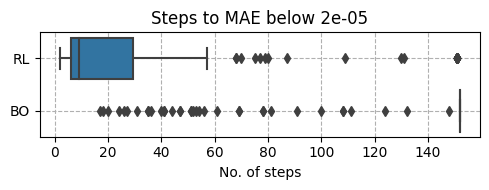

-----------------------------------------------------------
RL -> 7.0
BO -> 32.0


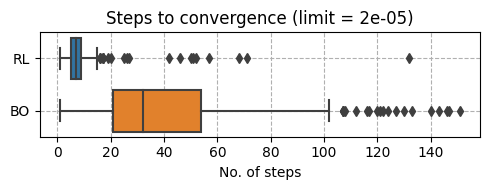

-----------------------------------------------------------


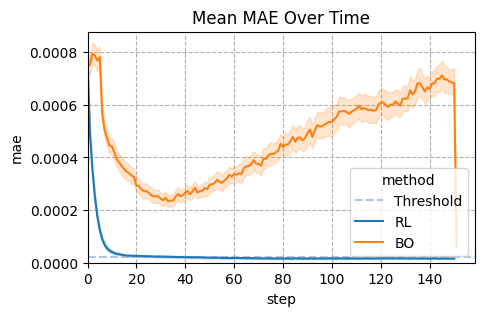

-----------------------------------------------------------


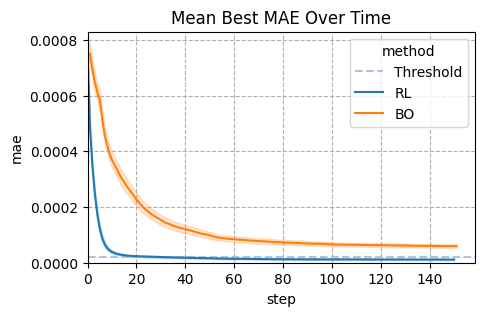

-----------------------------------------------------------
RL -> 7.071090067256591e-06
BO -> 0.0005660077149514109


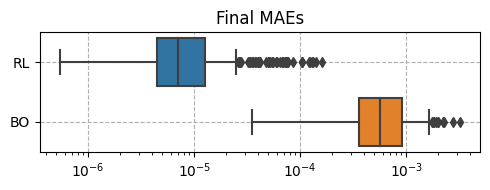

-----------------------------------------------------------
RL -> 4.440665406946209e-06
BO -> 4.5300330384634435e-05


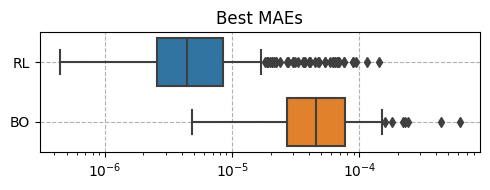

In [3]:
full_evaluation(rl, bo, save_dir="../Autonomous Accelerator Closing Paper/figures")


### Small beam runs (simulation)

Evaluating rl = 27 vs. bo = 27 problems
-----------------------------------------------------------
RL -> 28.0
BO -> 152.0


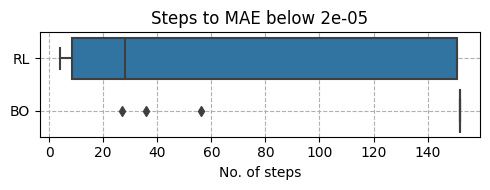

-----------------------------------------------------------
RL -> 6.0
BO -> 27.0


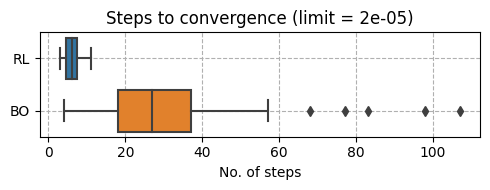

-----------------------------------------------------------


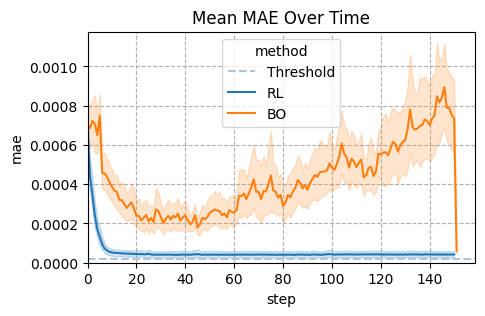

-----------------------------------------------------------


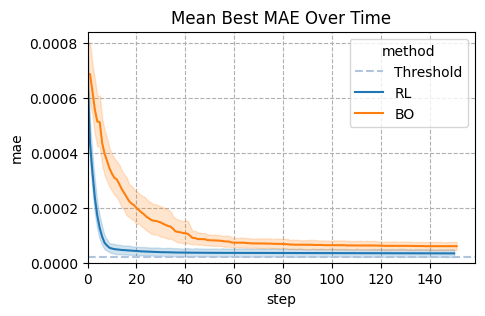

-----------------------------------------------------------
RL -> 1.6785850675660186e-05
BO -> 0.0005999708664603531


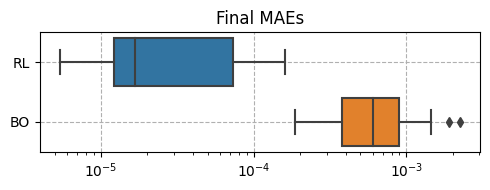

-----------------------------------------------------------
RL -> 1.674404484219849e-05
BO -> 4.337483551353216e-05


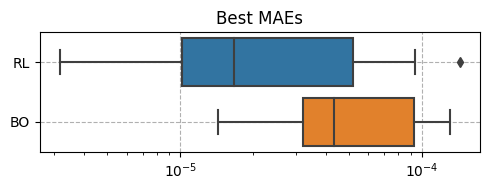

In [4]:
full_evaluation(rl[:27], bo[:27])


### Large beam runs (simulation)

Evaluating rl = 273 vs. bo = 273 problems
-----------------------------------------------------------
RL -> 9.0
BO -> 152.0


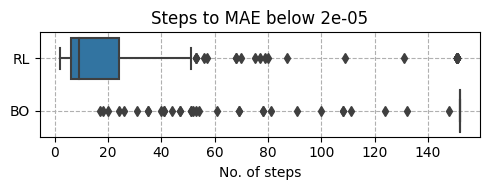

-----------------------------------------------------------
RL -> 7.0
BO -> 32.0


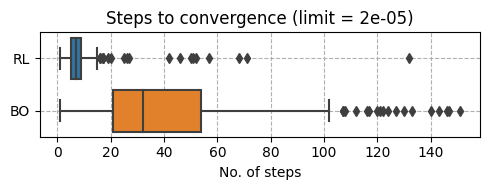

-----------------------------------------------------------


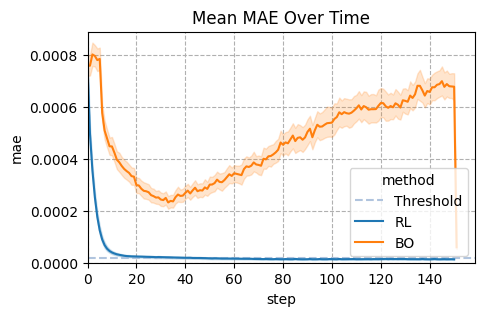

-----------------------------------------------------------


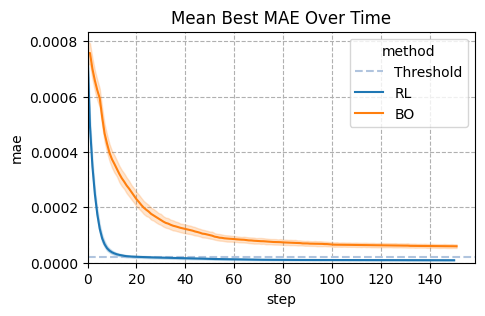

-----------------------------------------------------------
RL -> 6.393906005541794e-06
BO -> 0.0005613598041236401


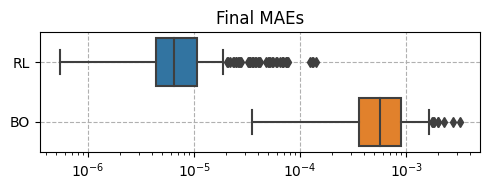

-----------------------------------------------------------
RL -> 4.168592568021268e-06
BO -> 4.5722321374341846e-05


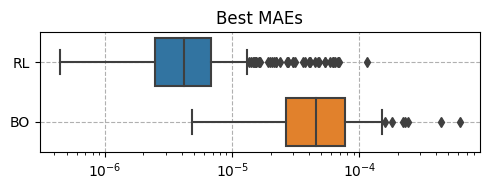

In [5]:
full_evaluation(rl[27:], bo[27:])


### Only the first beam run

Evaluating rl = 1 vs. bo = 1 problems
-----------------------------------------------------------
RL -> 151.0
BO -> 152.0


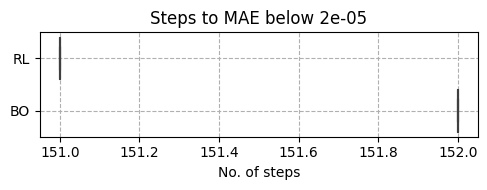

-----------------------------------------------------------
RL -> 3.0
BO -> 4.0


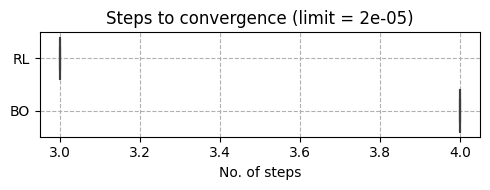

-----------------------------------------------------------


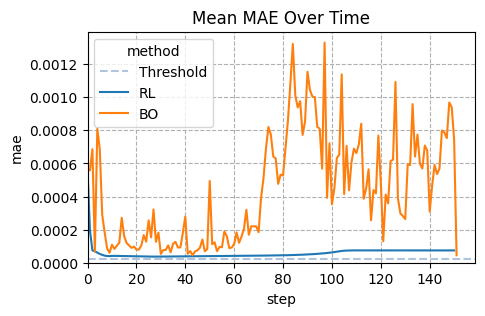

-----------------------------------------------------------


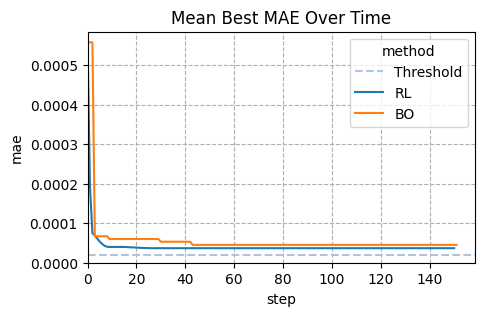

-----------------------------------------------------------
RL -> 7.43193959351629e-05
BO -> 0.0007456659805029631


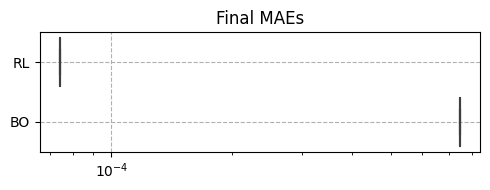

-----------------------------------------------------------
RL -> 3.682381066028029e-05
BO -> 4.5236734877107665e-05


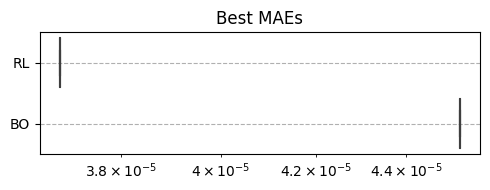

In [6]:
full_evaluation(rl[:1], bo[:1])


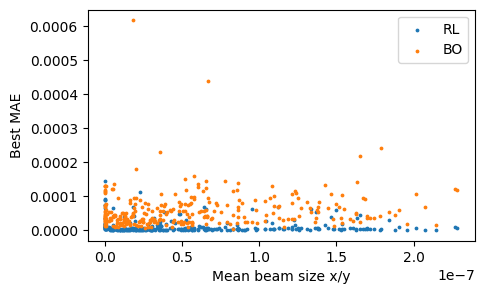

In [7]:
plot_target_beam_size_mae_correlation(rl, bo)


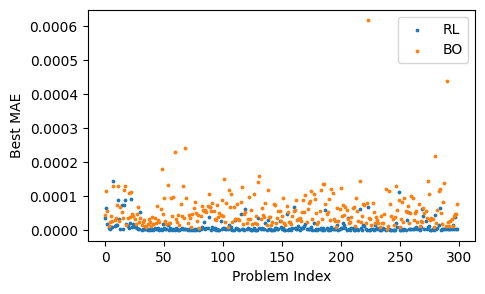

In [8]:
plot_best_mae_over_problem(rl, bo)


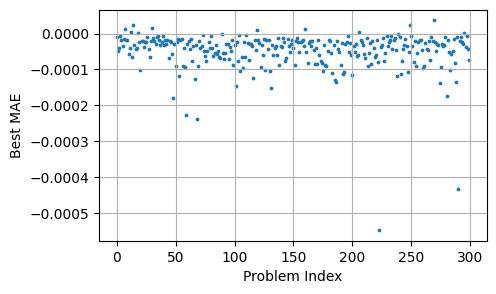

In [9]:
plot_best_mae_diff_over_problem(rl, bo)


## Real data

In [10]:
rl_real = load_eval_data("kit_shift_data/rl")
bo_real = load_eval_data("kit_shift_data/bo")


Evaluating rl = 16 vs. bo = 16 problems
-----------------------------------------------------------
RL -> 51.0
BO -> 77.0


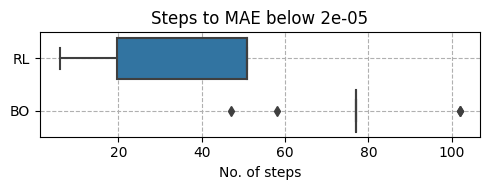

-----------------------------------------------------------
RL -> 8.0
BO -> 25.0


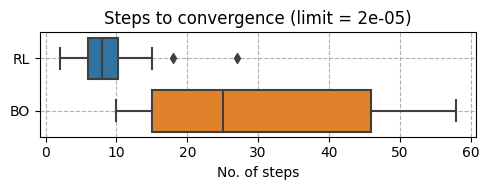

-----------------------------------------------------------


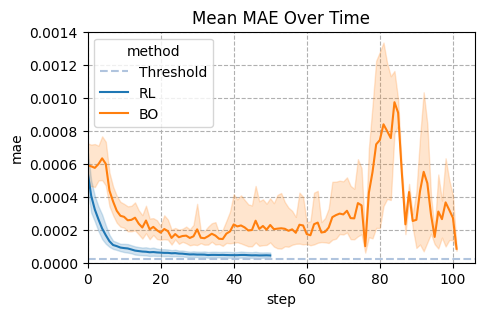

-----------------------------------------------------------


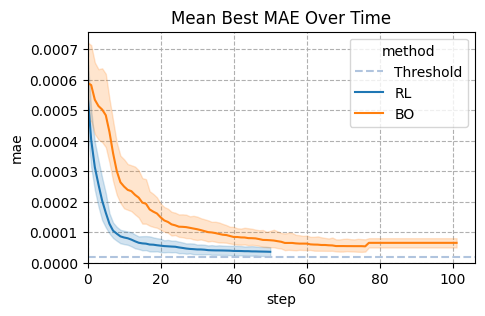

-----------------------------------------------------------
RL -> 3.366695818840526e-05
BO -> 0.00018265452672494575


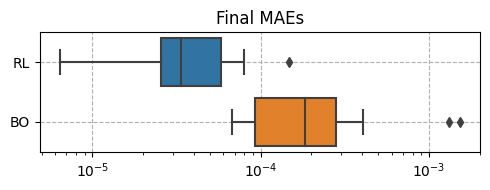

-----------------------------------------------------------
RL -> 2.4461009161313996e-05
BO -> 3.9224716601893306e-05


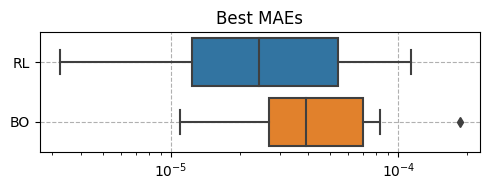

In [11]:
full_evaluation(rl_real, bo_real)


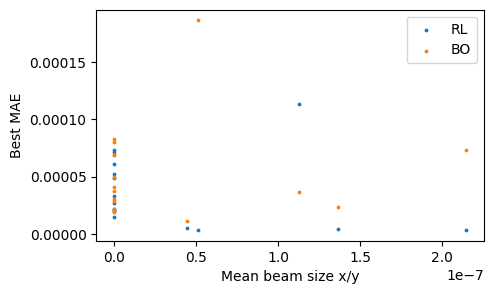

In [12]:
plot_target_beam_size_mae_correlation(rl_real, bo_real)


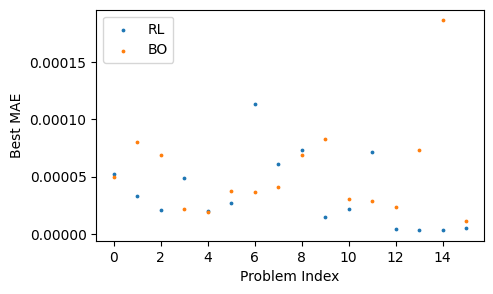

In [13]:
plot_best_mae_over_problem(rl_real, bo_real)


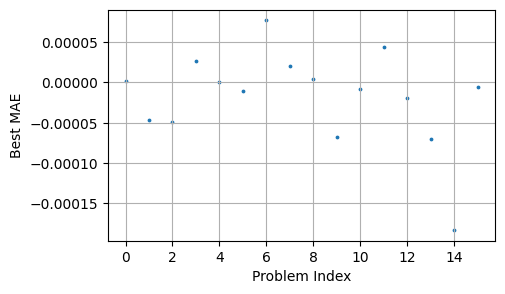

In [14]:
plot_best_mae_diff_over_problem(rl_real, bo_real)


In [15]:
import numpy as np
import matplotlib.pyplot as plt


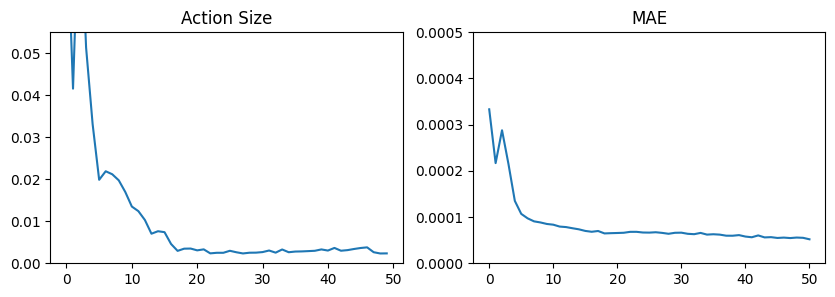

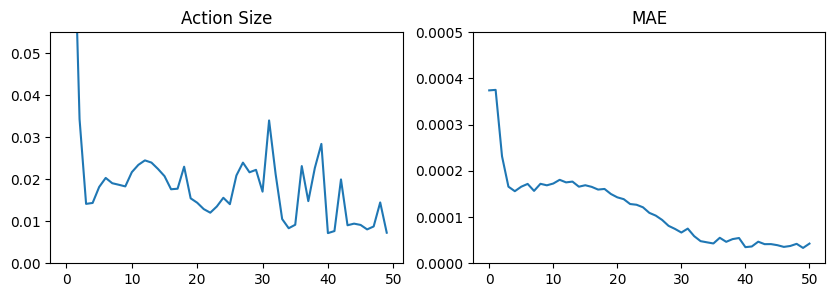

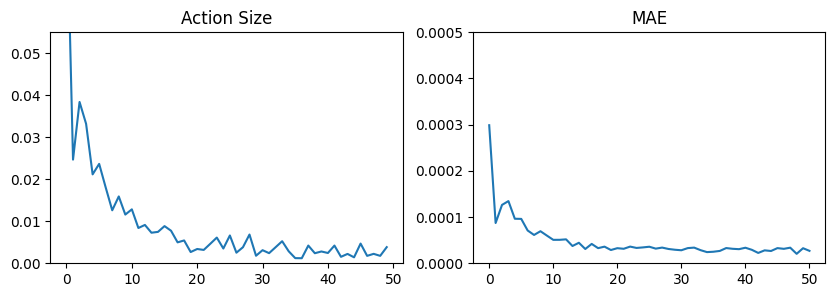

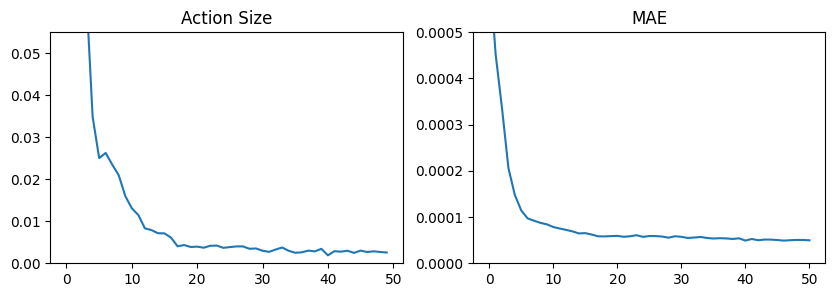

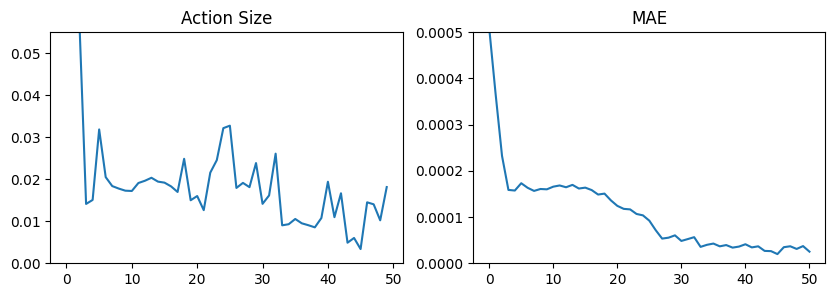

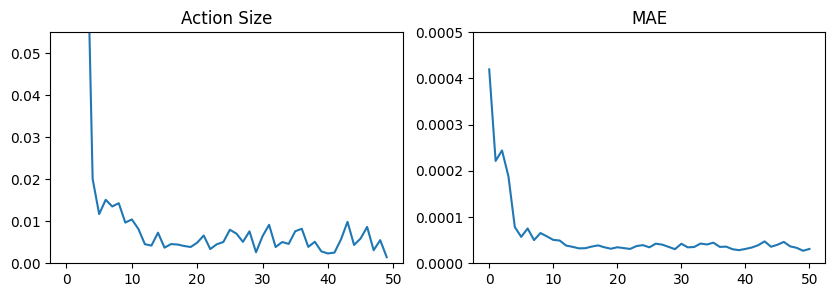

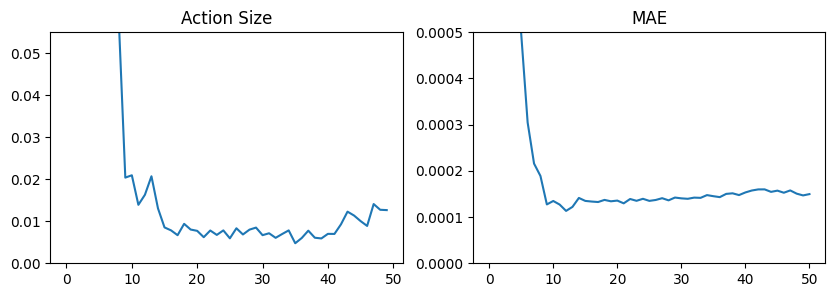

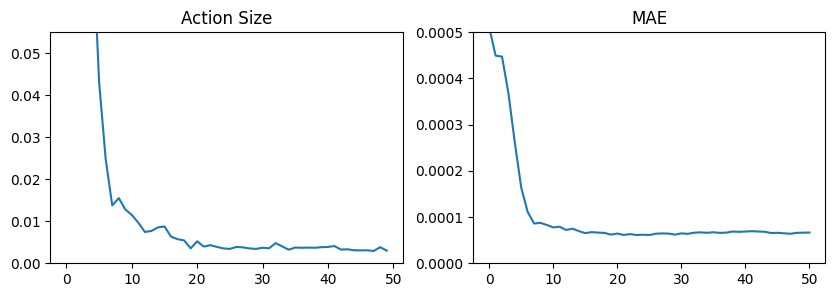

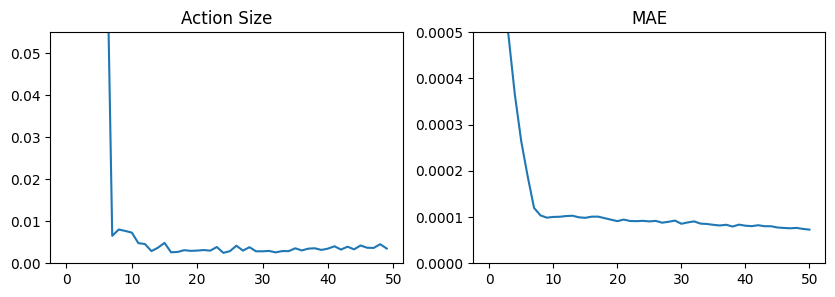

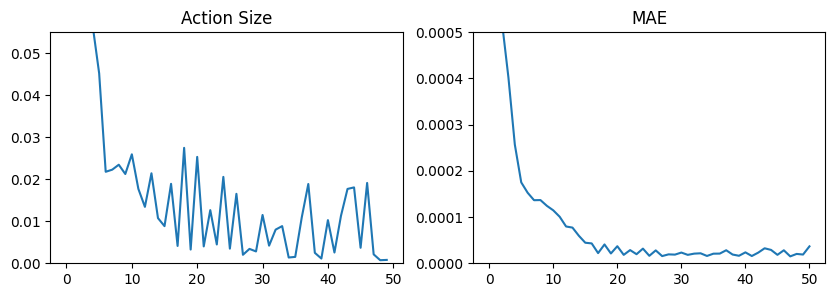

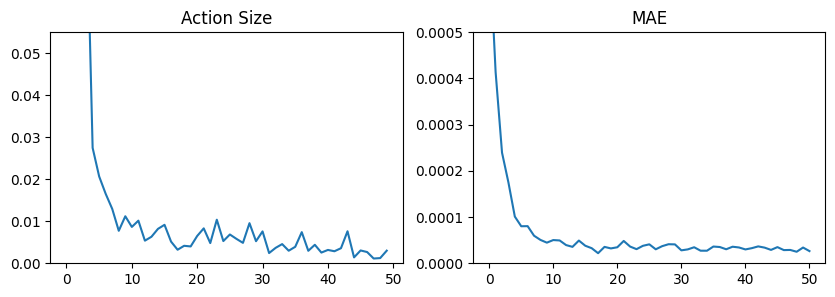

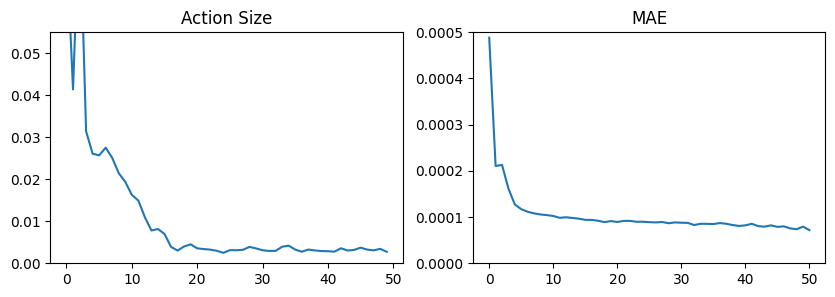

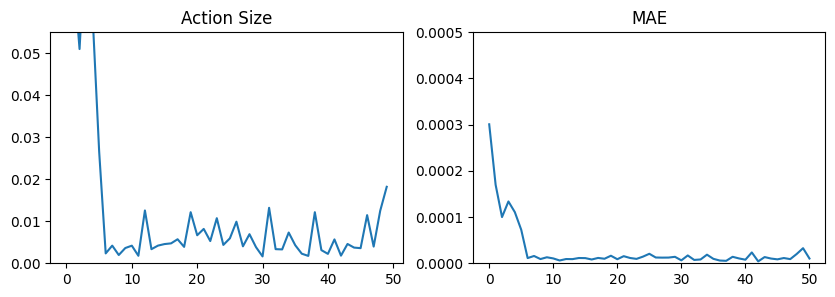

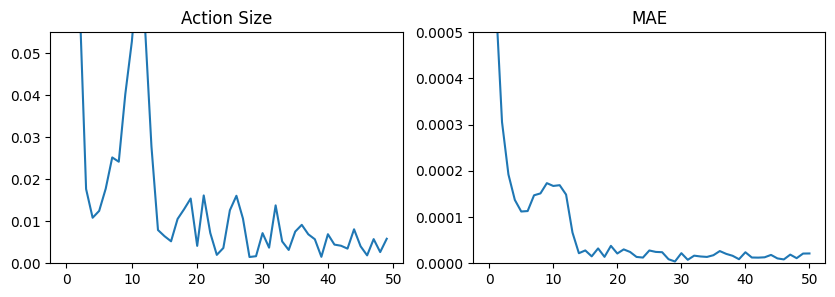

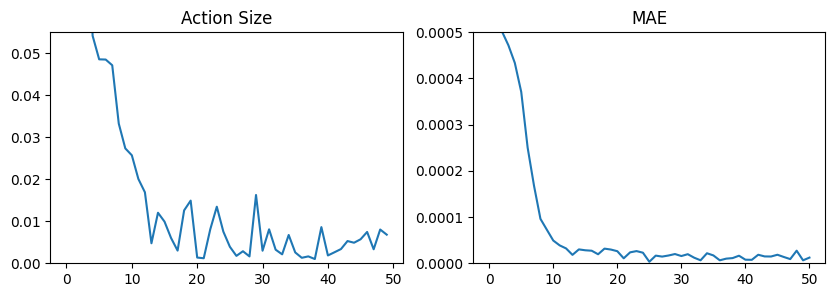

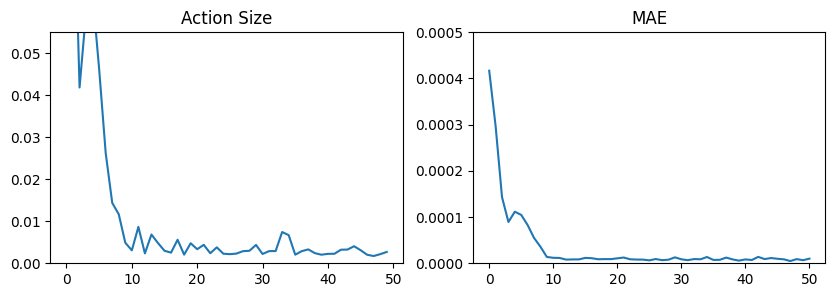

In [16]:
for episode in rl_real:
    actions = np.stack(episode["actions"])
    normalized = actions / [72, 72, 6.1782e-3, 72, 6.1782e-3]
    action_sizes = np.max(np.abs(normalized), axis=1)

    maes = get_maes(episode)

    plt.figure(figsize=(10, 3))
    plt.subplot(121)
    plt.title("Action Size")
    plt.plot(action_sizes)
    plt.ylim(0, 0.055)
    plt.subplot(122)
    plt.title("MAE")
    plt.plot(maes)
    plt.ylim(0, 0.0005)
    plt.show()


In [17]:
1, 4


(1, 4)

In [18]:
rl_real[1]["observations"][0]["target"]


array([0.    , 0.0005, 0.    , 0.    ], dtype=float32)

In [19]:
rl_real[4]["observations"][0]["target"]


array([-0.001 ,  0.0005,  0.    ,  0.    ], dtype=float32)

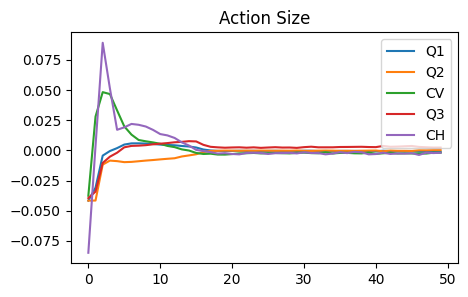

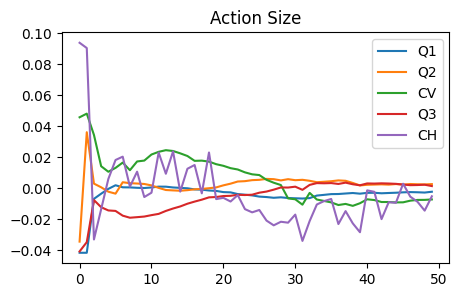

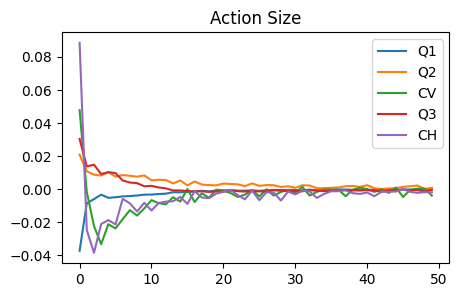

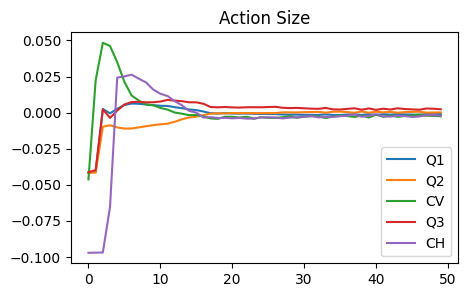

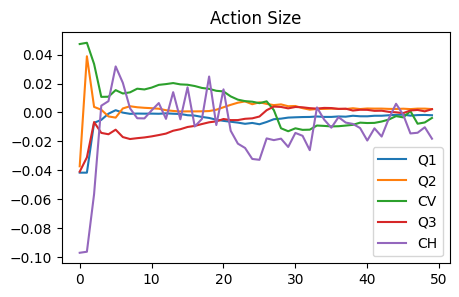

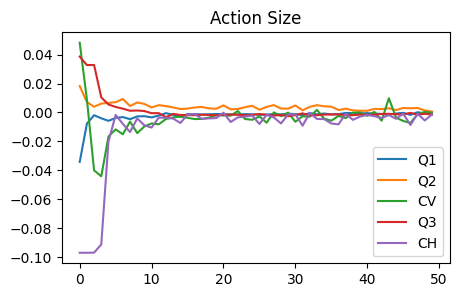

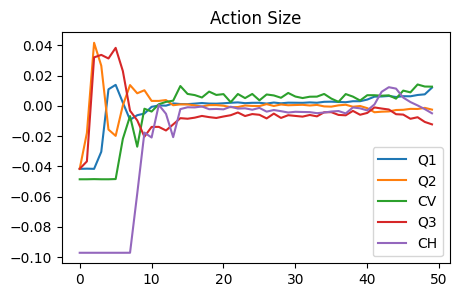

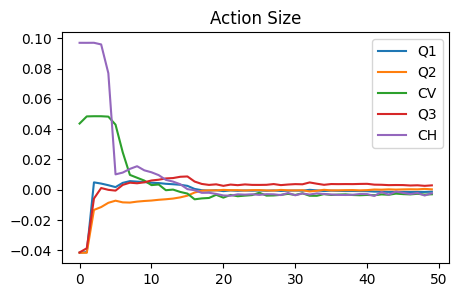

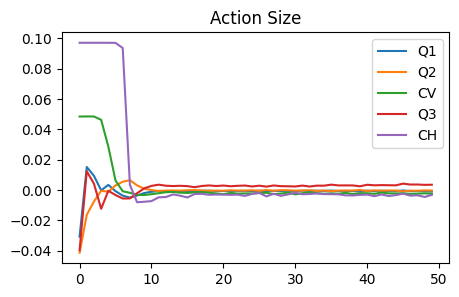

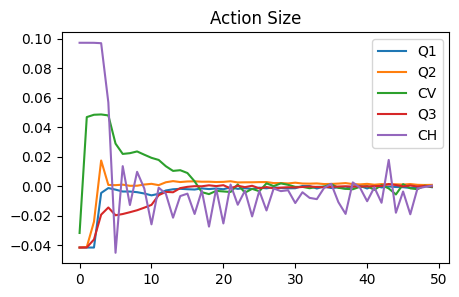

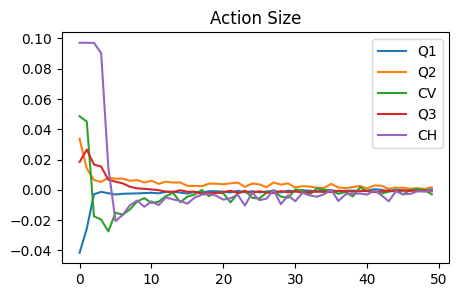

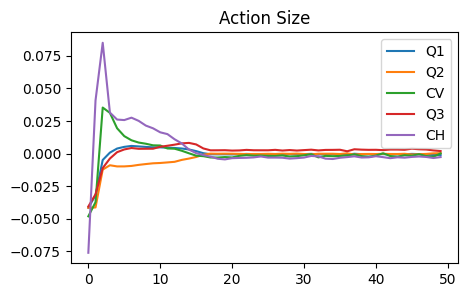

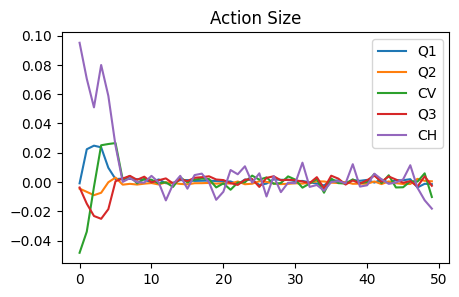

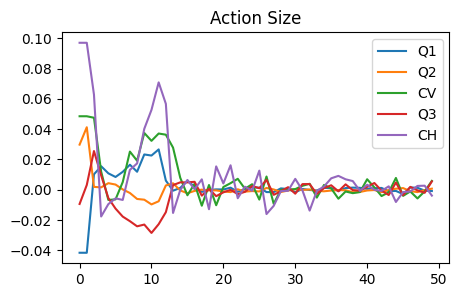

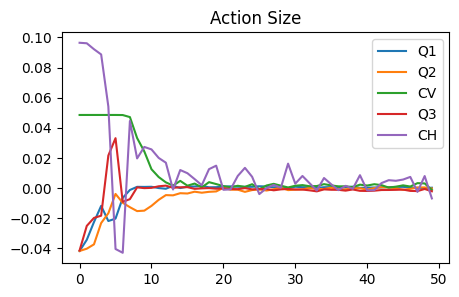

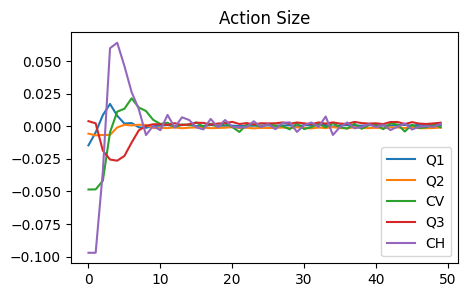

In [20]:
for episode in rl_real:
    actions = np.stack(episode["actions"])
    normalized = actions / [72, 72, 6.1782e-3, 72, 6.1782e-3]
    normalized = normalized

    plt.figure(figsize=(5, 3))
    plt.title("Action Size")
    plt.plot(normalized[:, 0], label="Q1")
    plt.plot(normalized[:, 1], label="Q2")
    plt.plot(normalized[:, 2], label="CV")
    plt.plot(normalized[:, 3], label="Q3")
    plt.plot(normalized[:, 4], label="CH")
    plt.legend()
    plt.show()


In [21]:
rl_real[0]["observations"][0]["beam"]


array([0.00035522, 0.00011841, 0.00010399, 0.00075537], dtype=float32)

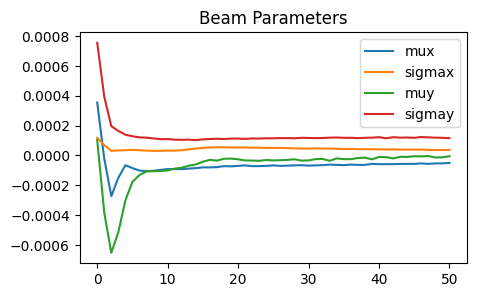

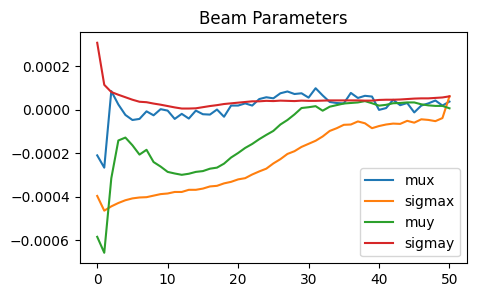

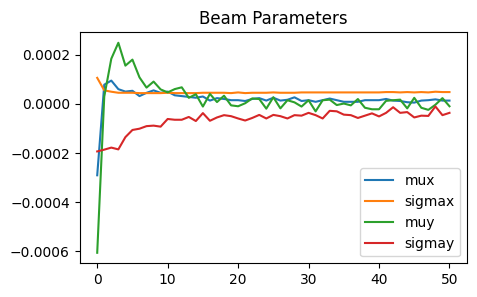

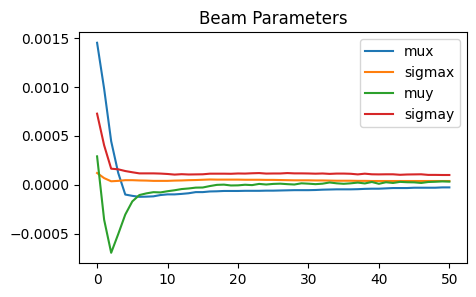

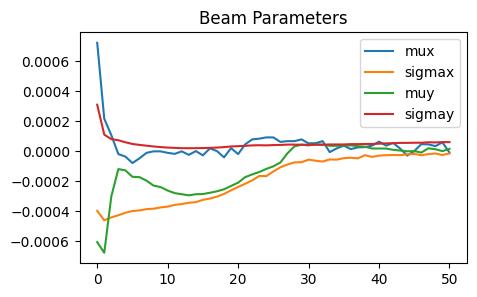

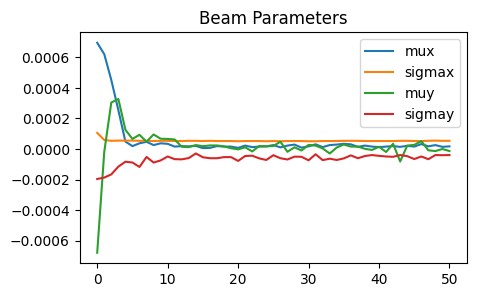

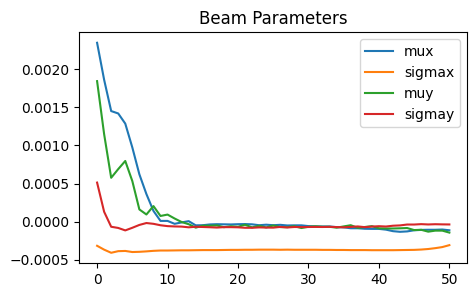

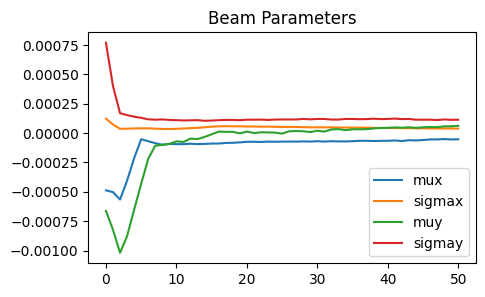

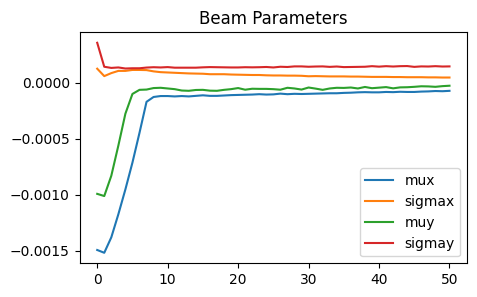

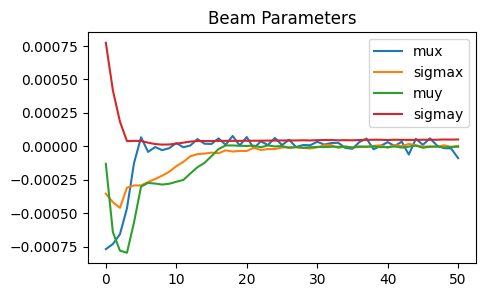

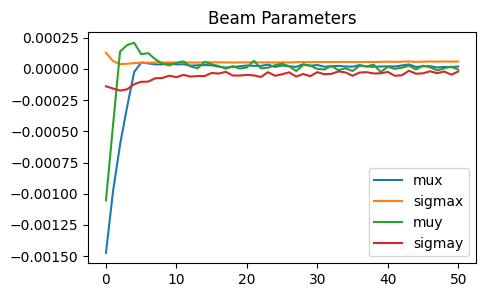

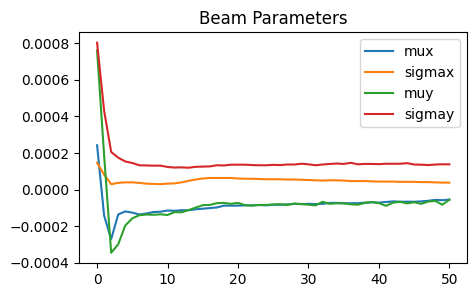

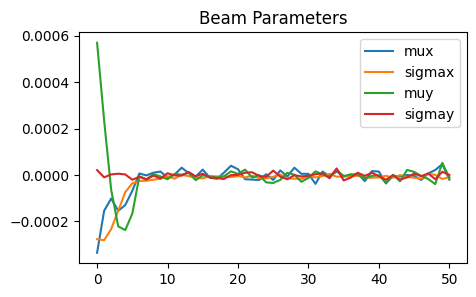

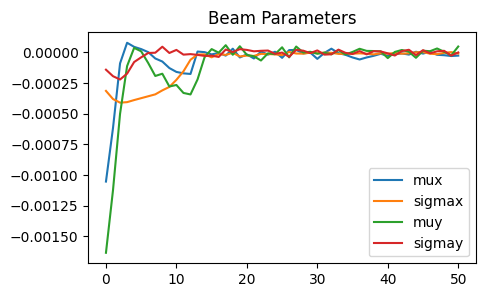

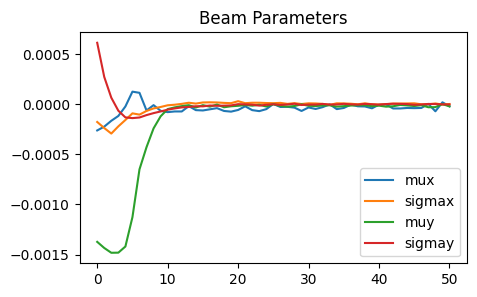

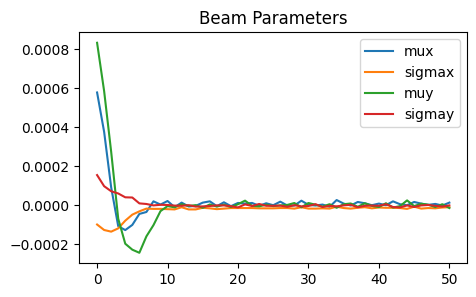

In [22]:
for episode in rl_real:
    beams = np.stack([obs["beam"] for obs in episode["observations"]])
    targets = np.stack([obs["target"] for obs in episode["observations"]])

    diffs = beams - targets

    plt.figure(figsize=(5, 3))
    plt.title("Beam Parameters")
    plt.plot(diffs[:, 0], label="mux")
    plt.plot(diffs[:, 1], label="sigmax")
    plt.plot(diffs[:, 2], label="muy")
    plt.plot(diffs[:, 3], label="sigmay")
    plt.legend()
    plt.show()


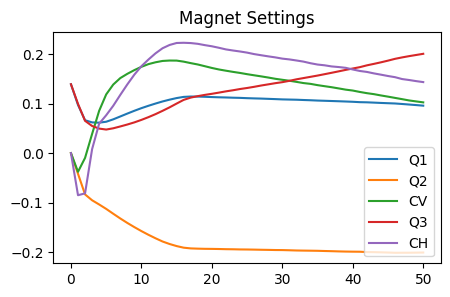

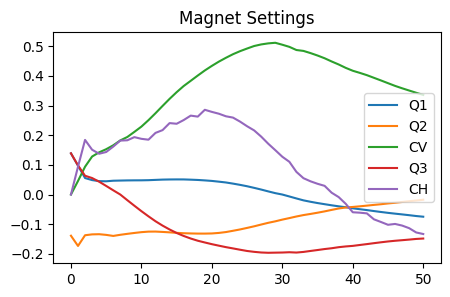

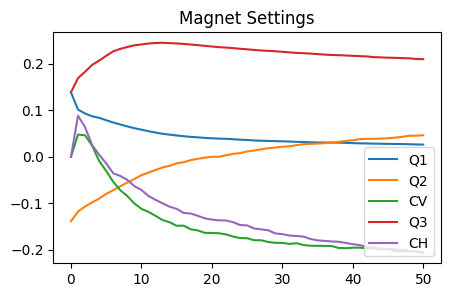

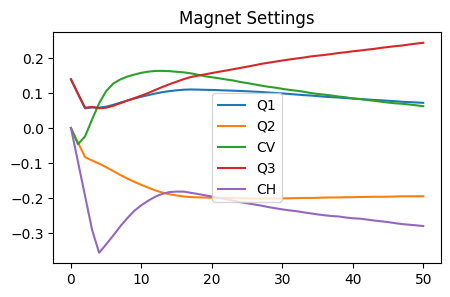

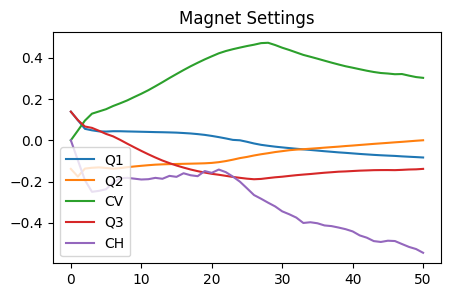

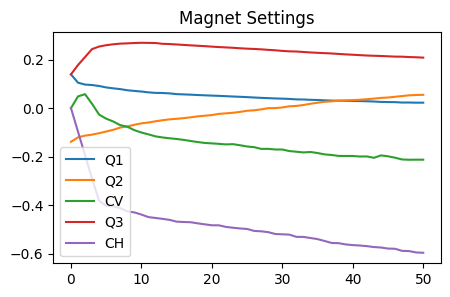

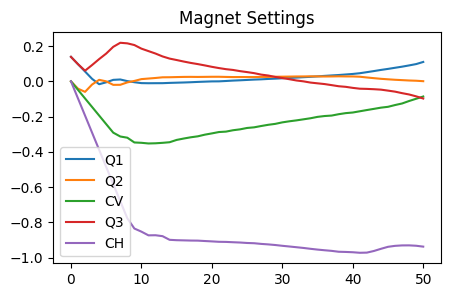

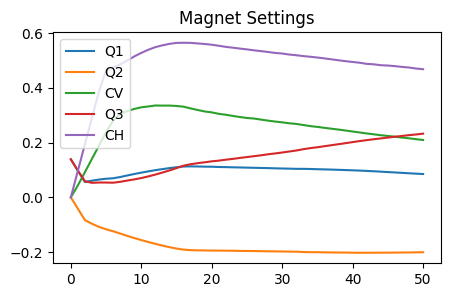

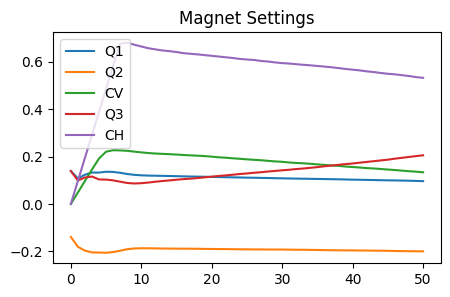

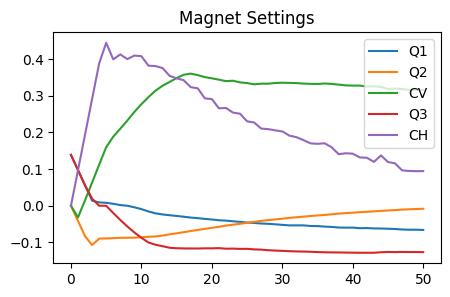

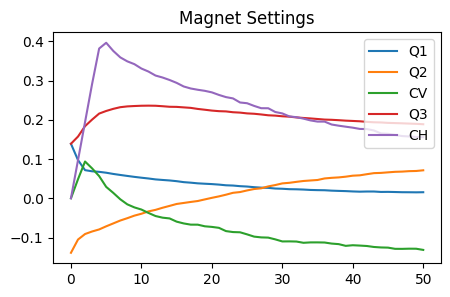

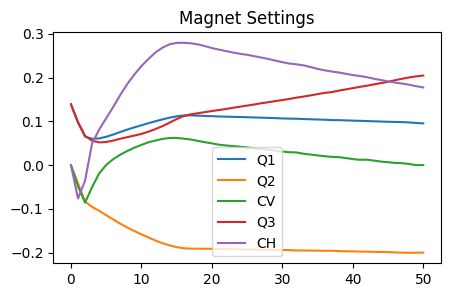

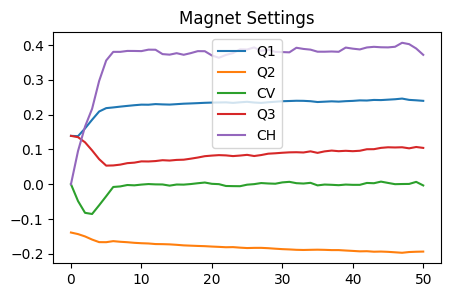

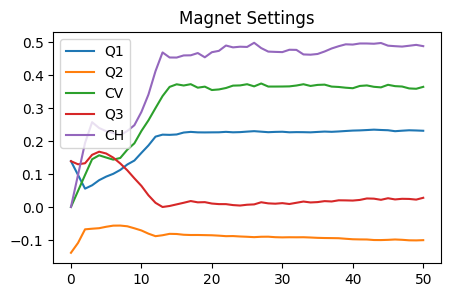

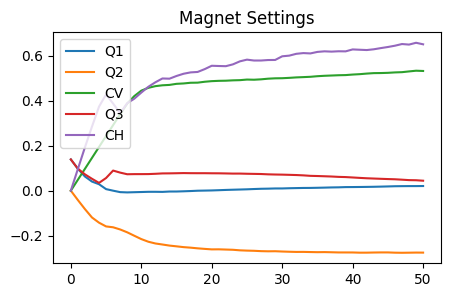

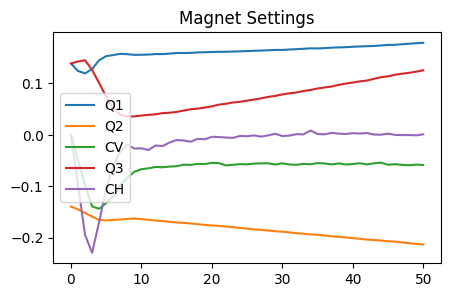

In [23]:
for episode in rl_real:
    magnets = np.stack([obs["magnets"] for obs in episode["observations"]])
    normalized = magnets / [72, 72, 6.1782e-3, 72, 6.1782e-3]

    plt.figure(figsize=(5, 3))
    plt.title("Magnet Settings")
    plt.plot(normalized[:, 0], label="Q1")
    plt.plot(normalized[:, 1], label="Q2")
    plt.plot(normalized[:, 2], label="CV")
    plt.plot(normalized[:, 3], label="Q3")
    plt.plot(normalized[:, 4], label="CH")
    plt.legend()
    plt.show()


2.278259489685297e-05


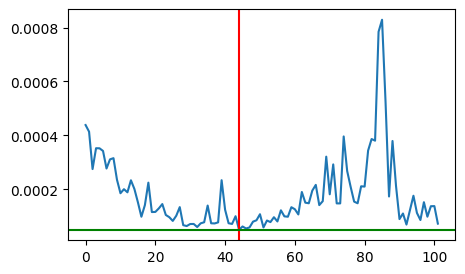

1.614642678759992e-05


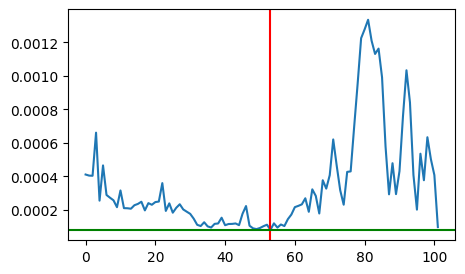

1.1036958312615752e-05


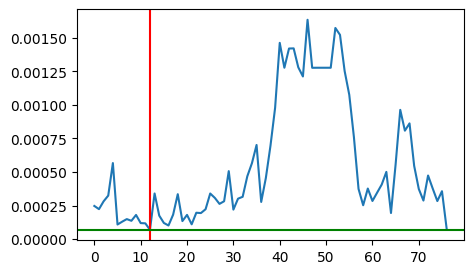

4.172931585344486e-05


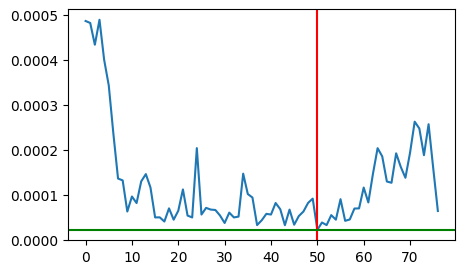

2.863457120838575e-05


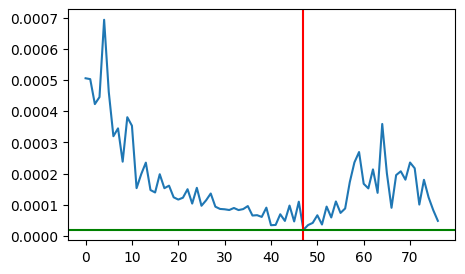

2.101667269016616e-05


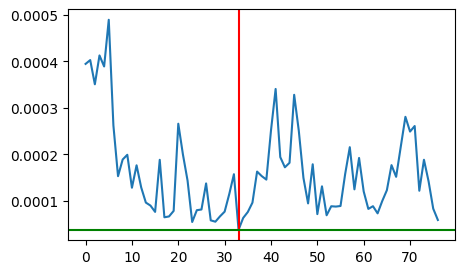

1.475865428801626e-05


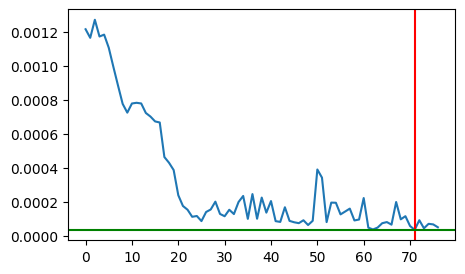

3.146382005070336e-05


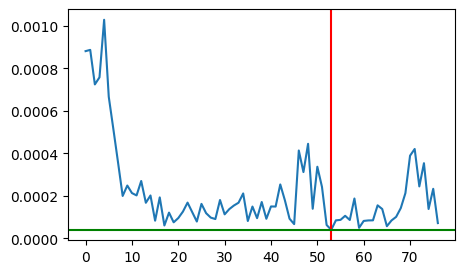

1.1165451724082232e-05


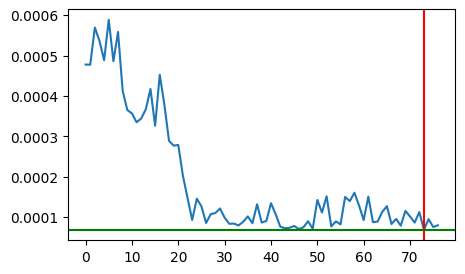

3.3410469768568873e-07


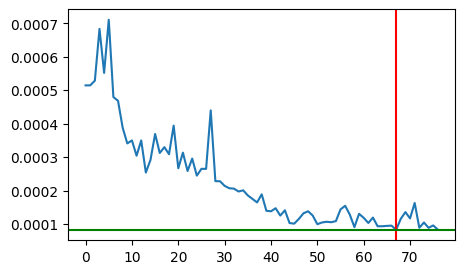

9.776720617082901e-06


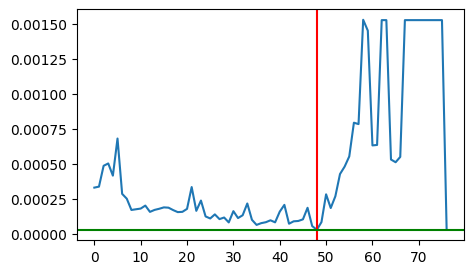

2.5363224267493933e-05


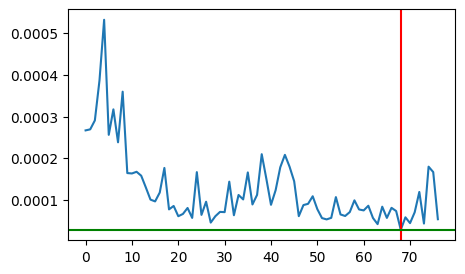

3.4895525459432974e-05


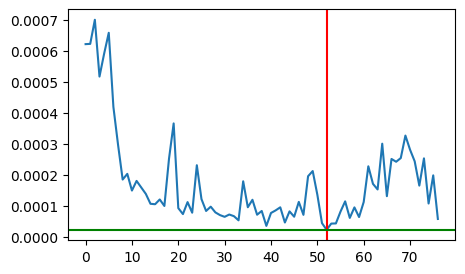

0.0


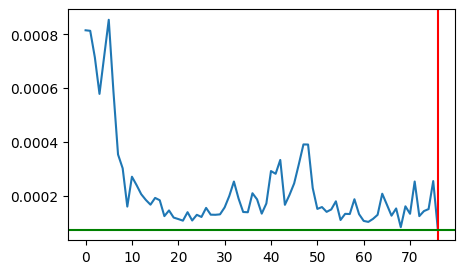

2.2641761461272836e-06


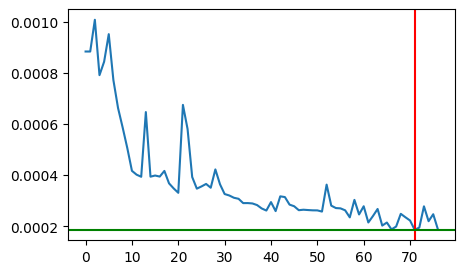

1.917782356031239e-06


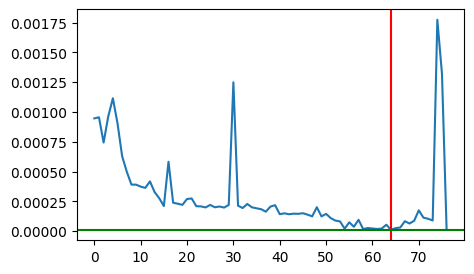

In [24]:
for episode in bo_real:
    maes = get_maes(episode)
    first = np.argmin(maes)

    print(abs(maes[first] - maes[-1]))

    plt.figure(figsize=(5, 3))
    plt.plot(maes)
    plt.axvline(first, c="red")
    plt.axhline(maes[first], c="green")
    plt.show()


### Simulation vs. Real

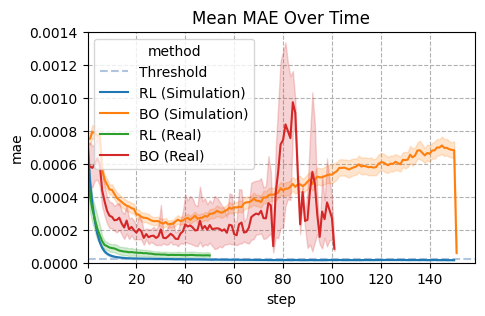

In [25]:
plot_mae_over_time(
    {
        "RL (Simulation)": rl,
        "BO (Simulation)": bo,
        "RL (Real)": rl_real,
        "BO (Real)": bo_real,
    },
    threshold=20e-6,
    save_path="../Autonomous Accelerator Closing Paper/figures/mean_mae_over_time_sim_vs_real_nonmatching.pdf"
)


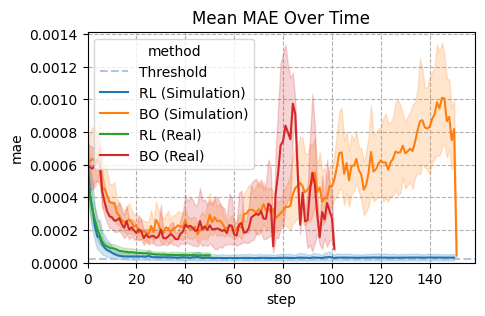

In [26]:
rl_sim_limited = [
    rl[0],
    rl[1],
    rl[2],
    rl[3],
    rl[4],
    rl[5],
    rl[42],
    rl[24],
    rl[6],
    rl[7],
    rl[8],
    rl[9],
    rl[30],
    rl[31],
    rl[32],
    rl[33],
]
bo_sim_limited = [
    bo[0],
    bo[1],
    bo[2],
    bo[3],
    bo[4],
    bo[5],
    bo[42],
    bo[24],
    bo[6],
    bo[7],
    bo[8],
    bo[9],
    bo[30],
    bo[31],
    bo[32],
    bo[33],
]

plot_mae_over_time(
    {
        "RL (Simulation)": rl_sim_limited,
        "BO (Simulation)": bo_sim_limited,
        "RL (Real)": rl_real,
        "BO (Real)": bo_real,
    },
    threshold=20e-6,
    save_path="../Autonomous Accelerator Closing Paper/figures/mean_mae_over_time_sim_vs_real_matching.pdf"
)


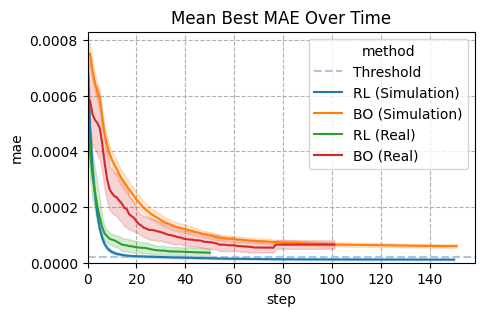

In [27]:
plot_best_mae_over_time(
    {
        "RL (Simulation)": rl,
        "BO (Simulation)": bo,
        "RL (Real)": rl_real,
        "BO (Real)": bo_real,
    },
    threshold=20e-6,
    save_path="../Autonomous Accelerator Closing Paper/figures/mean_best_mae_over_time_sim_vs_real_nonmatching.pdf"
)


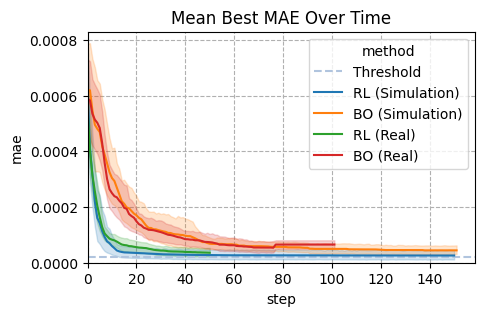

In [28]:
plot_best_mae_over_time(
    {
        "RL (Simulation)": rl_sim_limited,
        "BO (Simulation)": bo_sim_limited,
        "RL (Real)": rl_real,
        "BO (Real)": bo_real,
    },
    threshold=20e-6,
    save_path="../Autonomous Accelerator Closing Paper/figures/mean_best_mae_over_time_sim_vs_real_matching.pdf"
)